In [1]:
# -*- coing : utf-8 -*-
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 판다스 형태로 정의된 데이터를 출력할 때 scientific-notation이 아닌 float 모양으로 출력되게 해줌
pd.options.mode.chained_assignment = None

In [3]:
file = '../data/coin_Bitcoin.csv'
bitcoin = pd.read_csv(file)
print(bitcoin.shape)
print(bitcoin.info())
bitcoin.tail()

(2991, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2991 entries, 0 to 2990
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        2991 non-null   int64  
 1   Name       2991 non-null   object 
 2   Symbol     2991 non-null   object 
 3   Date       2991 non-null   object 
 4   High       2991 non-null   float64
 5   Low        2991 non-null   float64
 6   Open       2991 non-null   float64
 7   Close      2991 non-null   float64
 8   Volume     2991 non-null   float64
 9   Marketcap  2991 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 233.8+ KB
None


,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
2986,2987,Bitcoin,BTC,2021-07-02 23:59:59,33939.588699,32770.680780,33549.600177,33897.048590,3.872897e+10,6.354508e+11
2987,2988,Bitcoin,BTC,2021-07-03 23:59:59,34909.259899,33402.696536,33854.421362,34668.548402,2.438396e+10,6.499397e+11
2988,2989,Bitcoin,BTC,2021-07-04 23:59:59,35937.567147,34396.477458,34665.564866,35287.779766,2.492431e+10,6.615748e+11
2989,2990,Bitcoin,BTC,2021-07-05 23:59:59,35284.344430,33213.661034,35284.344430,33746.002456,2.672155e+10,6.326962e+11
2990,2991,Bitcoin,BTC,2021-07-06 23:59:59,35038.536363,33599.916169,33723.509655,34235.193451,2.650126e+10,6.418992e+11


In [7]:
# 2018 ~ 2021, 'Date', 'Close'
bitcoin_df = bitcoin[['Date', 'Close']].loc['2018-07-01 23:59:59':]
bitcoin_df

,Date,Close
2019,2018-11-08 23:59:59,6453.720000
2020,2018-11-09 23:59:59,6385.620000
2021,2018-11-10 23:59:59,6409.220000
2022,2018-11-11 23:59:59,6411.270000
2023,2018-11-12 23:59:59,6371.270000
...,...,...
2986,2021-07-02 23:59:59,33897.048590
2987,2021-07-03 23:59:59,34668.548402
2988,2021-07-04 23:59:59,35287.779766
2989,2021-07-05 23:59:59,33746.002456


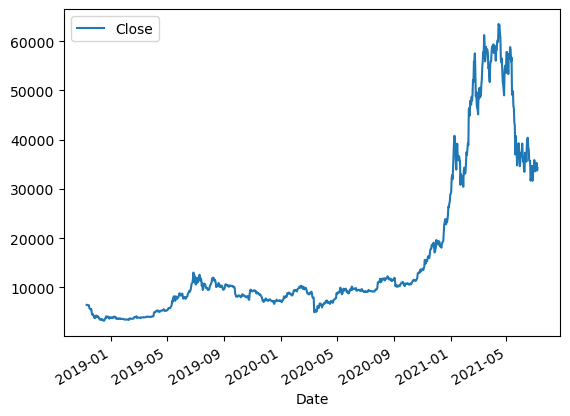

In [8]:
# 날짜형으로 변경
bitcoin_df['Date'] = pd.to_datetime(bitcoin_df['Date'])

bitcoin_df.index = bitcoin_df['Date']
bitcoin_df.set_index('Date', inplace = True)

bitcoin_df.plot()
plt.show()

prophet 라이브러리 

In [10]:
# 2018 ~ 2021, 'Date', 'Close'
bitcoin_df = bitcoin[['Date', 'Close']].loc['2018-07-01 23:59:59':]
bitcoin_df

,Date,Close
2019,2018-11-08 23:59:59,6453.720000
2020,2018-11-09 23:59:59,6385.620000
2021,2018-11-10 23:59:59,6409.220000
2022,2018-11-11 23:59:59,6411.270000
2023,2018-11-12 23:59:59,6371.270000
...,...,...
2986,2021-07-02 23:59:59,33897.048590
2987,2021-07-03 23:59:59,34668.548402
2988,2021-07-04 23:59:59,35287.779766
2989,2021-07-05 23:59:59,33746.002456


In [21]:
from prophet import Prophet

# prophet을 사용하기 위해서는 'ds', 'y'로 변경해야 함
bitcoin_df.columns = ['ds', 'y']

bitcoin_df

,ds,y
2019,2018-11-08 23:59:59,6453.720000
2020,2018-11-09 23:59:59,6385.620000
2021,2018-11-10 23:59:59,6409.220000
2022,2018-11-11 23:59:59,6411.270000
2023,2018-11-12 23:59:59,6371.270000
...,...,...
2986,2021-07-02 23:59:59,33897.048590
2987,2021-07-03 23:59:59,34668.548402
2988,2021-07-04 23:59:59,35287.779766
2989,2021-07-05 23:59:59,33746.002456


In [22]:
prophet = Prophet(seasonality_mode = 'multiplicative',
                 yearly_seasonality = True,
                 weekly_seasonality = True, 
                 daily_seasonality = True,
                 changepoint_prior_scale = 0.5)

prophet.fit(bitcoin_df)

C:\Users\yelin\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [25]:
future_data = prophet.make_future_dataframe(periods = 100, freq = 'd')
forecast_data = prophet.predict(future_data)
forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(5)

C:\Users\yelin\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\yelin\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,yhat,yhat_lower,yhat_upper
1067,2021-10-10 23:59:59,29162.753479,23862.043409,34730.534263
1068,2021-10-11 23:59:59,29391.701251,23800.987358,35021.852456
1069,2021-10-12 23:59:59,29712.474892,24395.090118,35317.855813
1070,2021-10-13 23:59:59,29943.985850,24504.193702,36072.911243
1071,2021-10-14 23:59:59,30245.834356,24479.168992,36184.951341


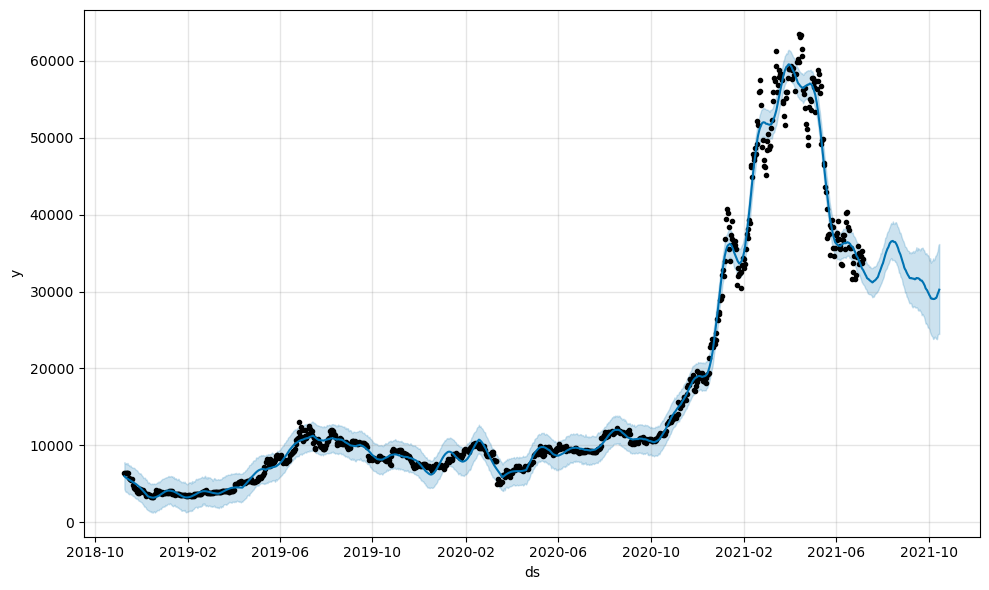

In [27]:
fig1 = prophet.plot(forecast_data)

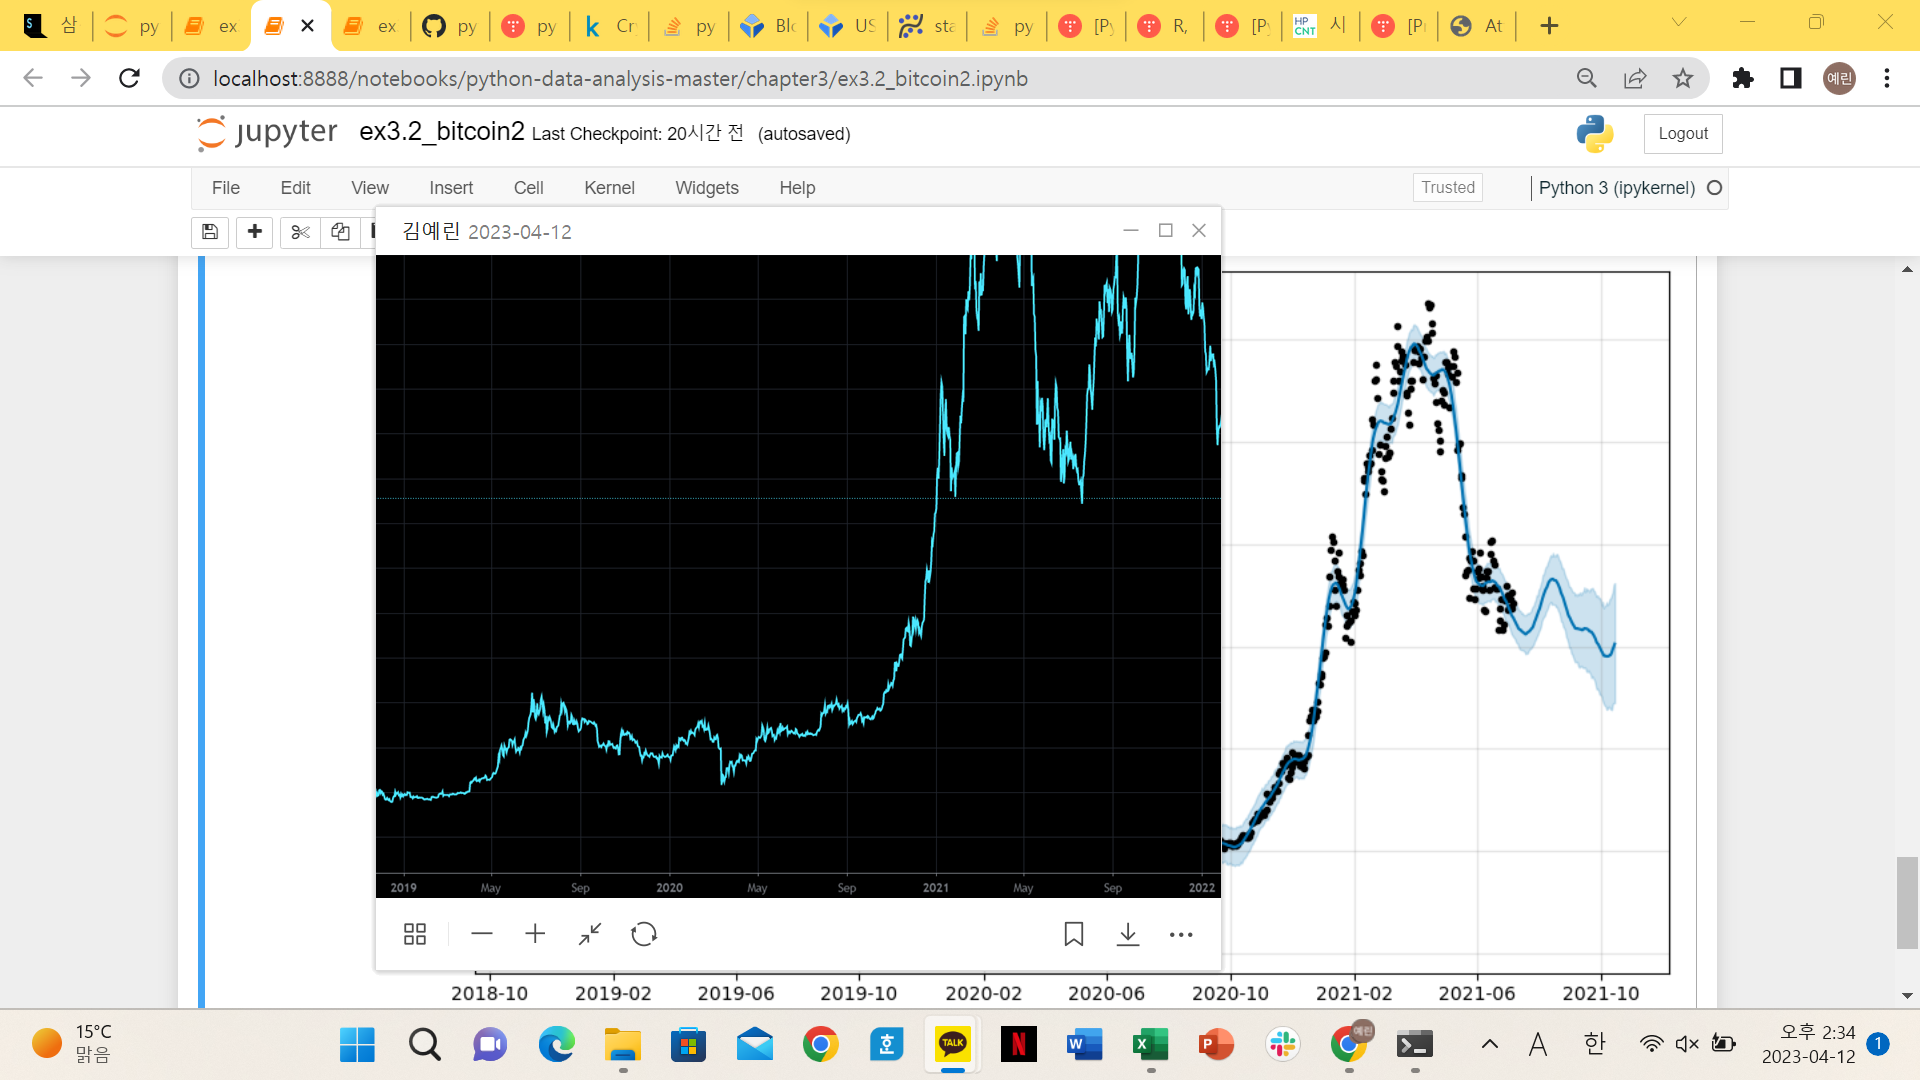

C:\Users\yelin\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\yelin\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\yelin\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


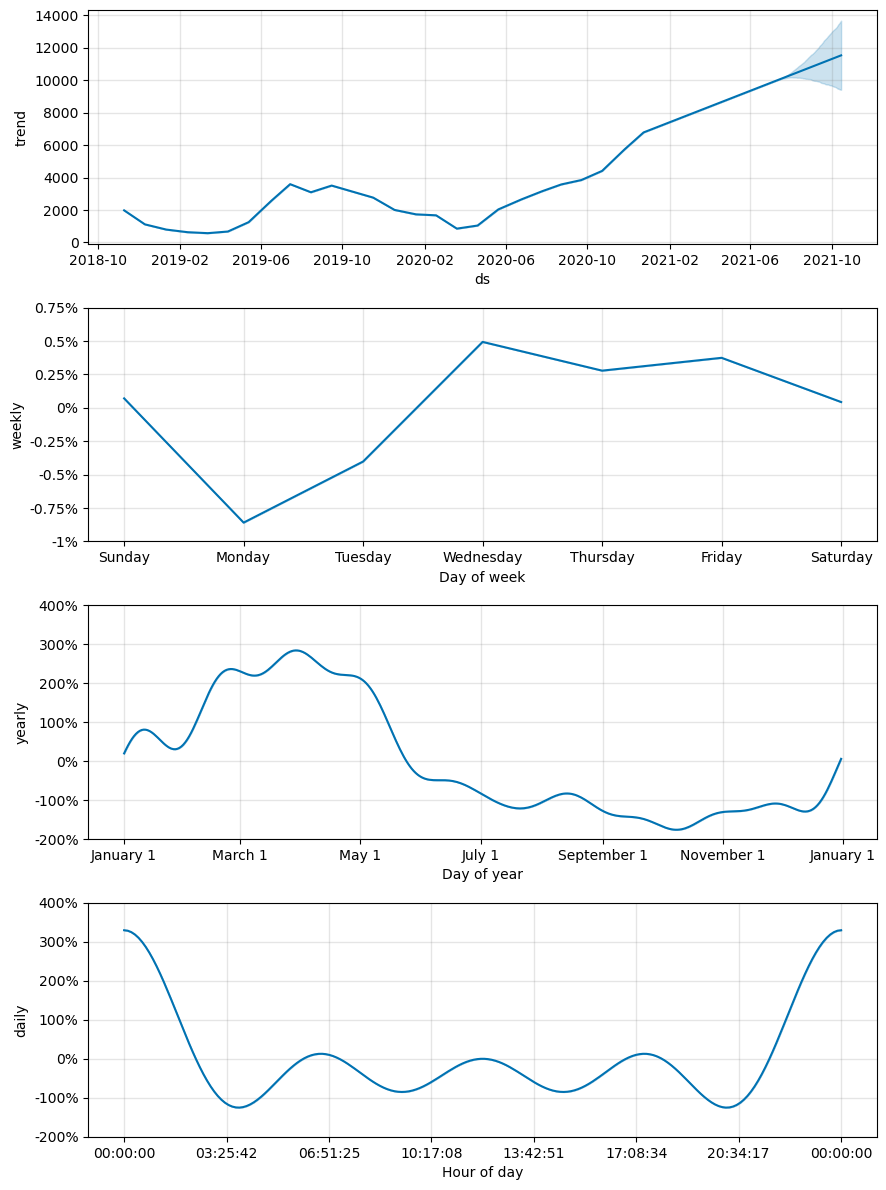

In [29]:
fig2 = prophet.plot_components(forecast_data)